In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}

In [3]:
admission = pd.read_csv('./datasets/admissions.csv')

In [4]:
admission.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [5]:
admission.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [6]:
admission.dropna(inplace=True)

In [7]:
admission.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

In [8]:
admission.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [9]:
admit = admission[admission['prestige'] == 1]

admit = pd.concat([admit]*10, axis=0)

admit.loc[admit.admit == 1, 'gpa'] += np.random.random(size=admit[admit.admit == 1].shape[0])
admit.loc[admit.admit == 0, 'gpa'] -= np.random.random(size=admit[admit.admit == 0].shape[0])

In [10]:
admit

,admit,gre,gpa,prestige
2,1,800.0,4.367693,1.0
6,1,560.0,3.233135,1.0
11,0,440.0,2.277786,1.0
12,1,760.0,4.012963,1.0
14,1,700.0,4.744137,1.0
19,1,540.0,4.689709,1.0
25,1,800.0,4.195247,1.0
26,1,620.0,4.152527,1.0
29,0,520.0,3.094547,1.0
34,0,360.0,2.680337,1.0


In [11]:
y = admission[['admit']].values
x = admission[['gpa']].values

linmod = LinearRegression()
linmod.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print(linmod.coef_)
print(linmod.intercept_)

[[ 0.21342491]]
[-0.40660856]


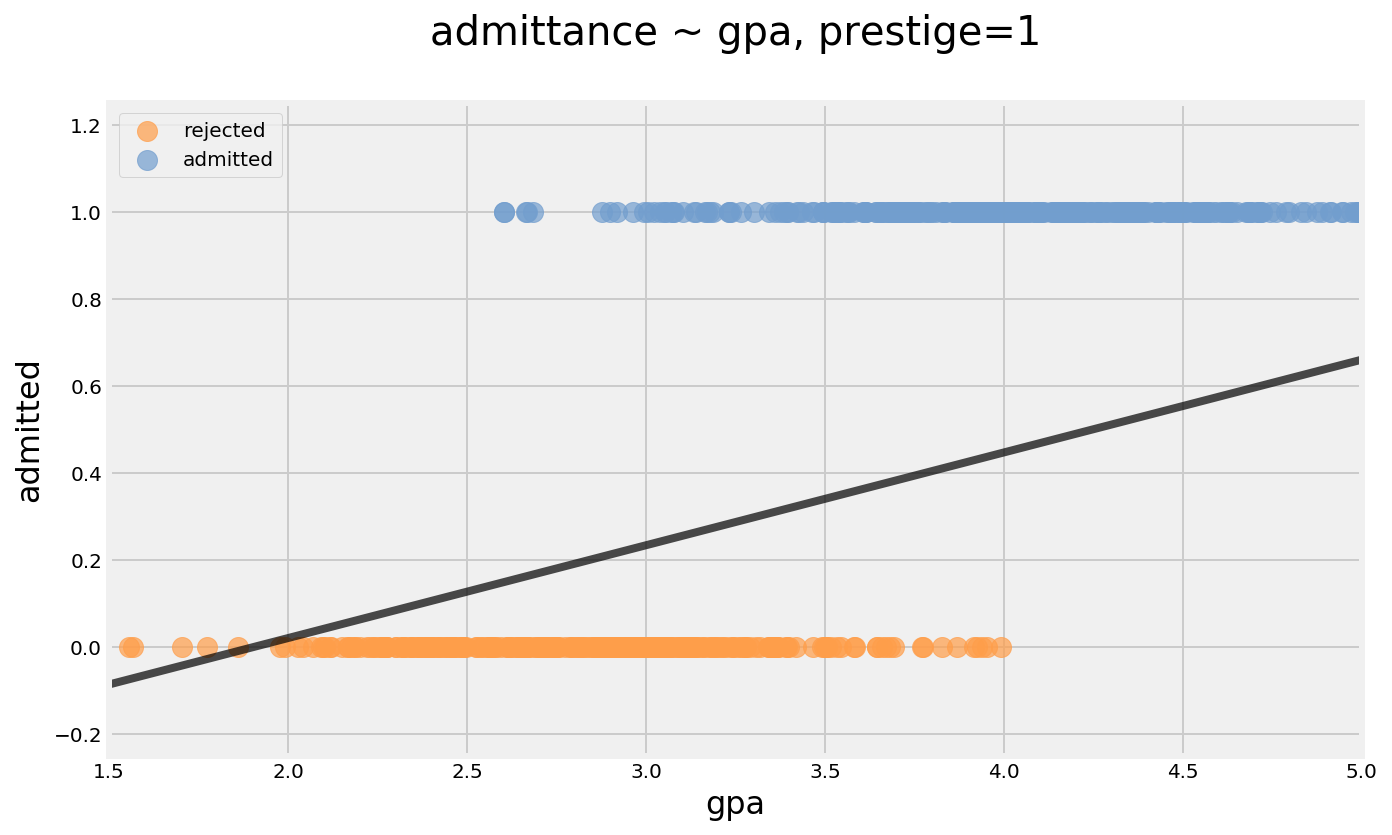

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
#fig.set_size_inches(6,5)

# plot the regression line for admit ~ gpa
x_vals = np.linspace(1.,5.,300)
ax.plot(x_vals, linmod.predict(x_vals[:, np.newaxis]),
        color='black', alpha=0.7, lw=4)

# do one scatter plot for each type of wine:
ax.scatter(admit.gpa[admit.admit == 0],
           admit.admit[admit.admit == 0],
           c=colors['orange'], s=100, alpha=0.7,
           label='rejected')

ax.scatter(admit.gpa[admit.admit == 1],
           admit.admit[admit.admit == 1],
           c=colors['blue'], s=100, alpha=0.7,
           label='admitted')

ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_title('admittance ~ gpa, prestige=1\n', fontsize=20)

ax.set_xlim([1.5,5])
ax.set_ylim(-0.25, 1.25)

plt.legend(loc='upper left')
plt.show()

In [23]:
y = admit[['admit']].values
X = admit[['gpa']].values
logreg= LogisticRegression()
logreg.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
print('log coefficient: ', logreg.coef_)
print('log intercept: ', logreg.intercept_)

log coefficient:  [[ 2.53750606]]
log intercept:  [-8.4545121]


In [27]:
print('log probabilities: ', logreg.predict_proba(X[0:5]))

log probabilities:  [[ 0.06732432  0.93267568]
 [ 0.56227801  0.43772199]
 [ 0.93551209  0.06448791]
 [ 0.15079152  0.84920848]
 [ 0.02702056  0.97297944]]


In [28]:
-logreg.intercept_[0]

8.4545121049542864

In [29]:
logreg.coef_[0][0]

2.5375060648377992

In [30]:
logreg.coef_

array([[ 2.53750606]])

In [32]:
d_boundary = -logreg.intercept_[0]/ logreg.coef_[0][0]

In [33]:
d_boundary

3.3318194671959178

In [34]:

logreg.predict_proba([[d_boundary]])

array([[ 0.5,  0.5]])

(-0.1, 1.1)

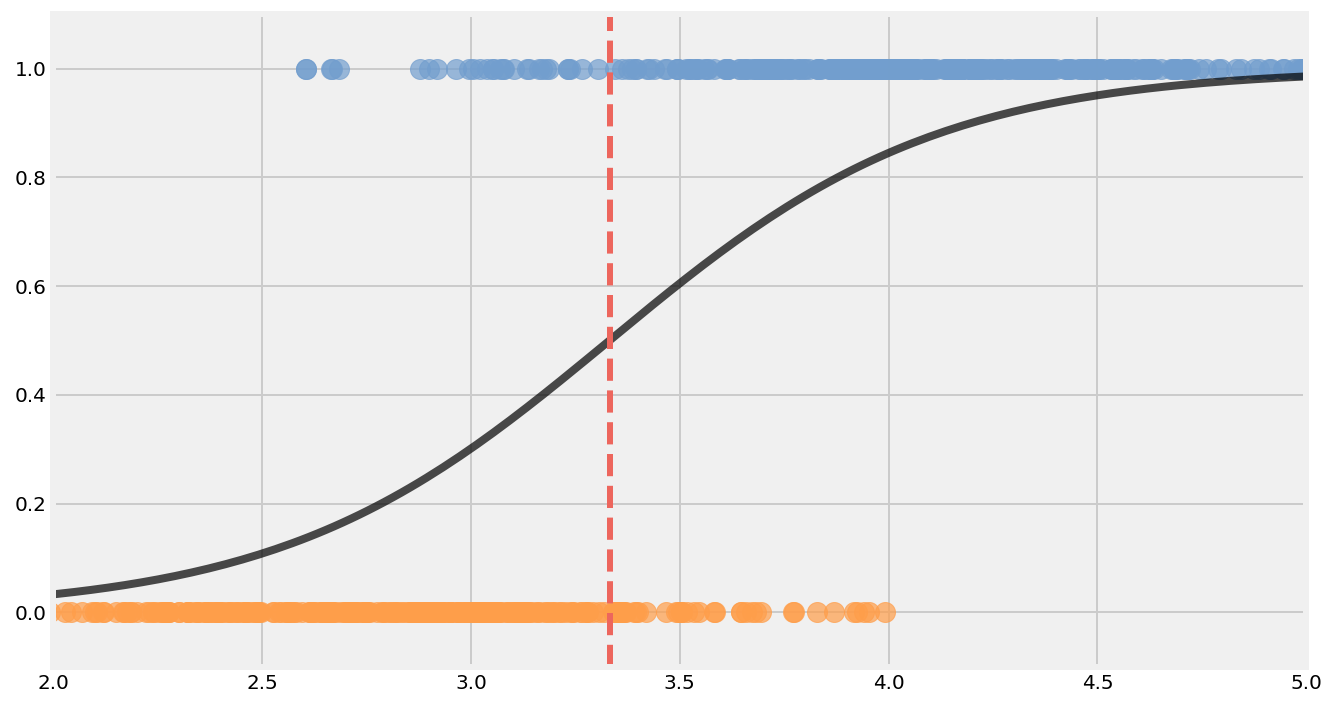

In [41]:
fig, ax = plt.subplots(figsize=(10,6))

x_vals = np.linspace(-1, 5, 300)
y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:,1]

ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

ax.scatter(admit.gpa[admit.admit == 0],
           admit.admit[admit.admit == 0],
           c=colors['orange'], s=100, alpha=0.7,
           label='rejected')

ax.scatter(admit.gpa[admit.admit == 1],
           admit.admit[admit.admit == 1],
           c=colors['blue'], s=100, alpha=0.7,
           label='admitted')

ax.axvline(d_boundary, lw=3, color=colors['red'], ls='dashed',
           label='gpa where P(y = 1) = 0.5')


ax.set_xlim([2.,5.])
ax.set_ylim([-0.1, 1.1])

In [42]:
Xs = X - X.mean()
print(Xs[0:5])

[[ 0.89327415]
 [-0.24128409]
 [-1.19663307]
 [ 0.53854417]
 [ 1.26971819]]


In [43]:
lg = LogisticRegression()

lg.fit(Xs, y)

print('Lg intercept: ', lg.intercept_)
print('Lg coefficient: ', lg.coef_)

Lg intercept:  [ 0.37511028]
Lg coefficient:  [[ 4.1374414]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
